<a href="https://colab.research.google.com/github/arj442/Practice/blob/main/Sentiment%20Anaylsis%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) About the Dataset

The following data is intended for advancing financial sentiment analysis research. It combines two datasets (FiQA, and Financial PhraseBank) into one easy-to-use CSV file. It provides financial sentences with sentiment labels in the following structure.

The dataset contains two columns

*   Sentiment: The sentiment can be negative, neutral or positive.
*   News Headline: Headlines of the news articles. Predicting the sentiment based on the news headlines.

# 2) Imports of Libraries and Helper Functions


In [ ]:
# Essentials
import numpy as np
import pandas as pd
from google.colab import files

## Visualization ##
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import nltk
import re
import string
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from textblob import TextBlob

# Machine Learning
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import AutoTokenizer, TFBertModel, BertTokenizer, TFBertForSequenceClassification

# NLTK resource setup
necessary_nltk_resources = ['punkt', 'stopwords', 'wordnet']
for resource in necessary_nltk_resources:
    try:
        nltk.data.find(f'tokenizers/punkt/{resource}.zip')
    except LookupError:
        nltk.download(resource, quiet=True)


# 3) Data Ingestion

The first step I would take is to import the dataset. If you have a dataset stored on your local drive, you can easily upload it to Colab using the following code. Once uploaded, you can load it into your notebook using a library such as pandas.

In [ ]:
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
#import data as a dataframe
data= pd.read_csv("/content/data.csv")

In [ ]:
#Change header name
X = data['Sentence'].values
y = data['Sentiment'].values

#4) Data Quality Checks

Data quality checks are crucial in ensuring reliable and fair NLP models. Garbage In, Garbage Out (GIGO) principle emphasizes the importance of high-quality input data. Biased or unrepresentative data can lead to discriminative models, reinforcing inequalities and discrimination. High-quality data helps mitigate bias and ensures fairness in AI applications. High-quality data allows NLP models to generalize well to unseen data, increasing their practical utility.

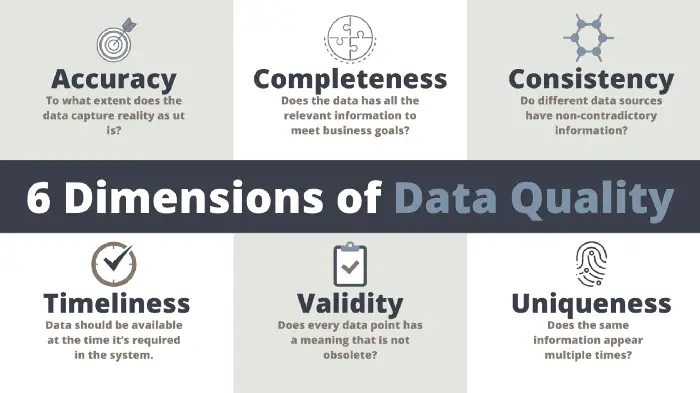

##4.1) Check Duplicates

The number of duplicates in a dataset can be a good indicator of its quality. A dataset with a high number of duplicates is more likely to be incomplete or inaccurate. By printing the number of duplicates in a dataset, you can assess its quality and determine whether it is suitable for your analysis.

In [ ]:
print("Number of duplicates: " + str(data.duplicated().sum()))

Number of duplicates: 6


##4.2) Check Null Data

The number of null values in a dataset can be a good indicator of its quality. A dataset with a high number of null values is more likely to be incomplete or inaccurate. By printing the number of null values in a dataset, you can assess its quality and determine whether it is suitable for your analysis.

In [ ]:
print("Number of null data: " + str(data.isnull().sum()))

Number of null data: Sentence     0
Sentiment    0
dtype: int64


##4.3) Check Shape of Data

The shape of a dataset tells you how many rows and columns it has. This information can be useful for understanding the structure of the dataset and how to best analyze it. For example, if you know that a dataset has a large number of rows and a small number of columns, you may want to use a different analysis method than if the dataset had a small number of rows and a large number of columns.

In [ ]:
rows = data.shape[0]
cols = data.shape[1]
print("Rows   : " + str(rows))
print("Columns: " + str(cols))

Rows   : 5842
Columns: 2


##4.4) Categorical features

The next step is to summarise the catergorical fearures of the data.
Summarizing categorical features can be useful for understanding the distribution of categorical data and identifying patterns or trends. In NLP, summarizing categorical features can be particularly helpful for understanding the relationships between categorical features and target variables, such as sentiment classification or topic modeling.

In [ ]:
print('### Categorical features ###','\n')
data.describe(include=['O'])

### Categorical features ### 



,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


##4.5) Number of unique values per column

The next step in the data quality checks is checking the uniqueness of the data. The reason for doing this, is that it provides a quick and useful summary of the distinctness of data in each column, assisting in various stages of data preprocessing and feature engineering, especially in NLP tasks.

In [ ]:
data.nunique()

Sentence     5322
Sentiment       3
dtype: int64

# 5) EDA

Exploratory Data Analysis (EDA) is an indispensable step in the Natural Language Processing (NLP) pipeline. It facilitates a comprehensive understanding of the underlying structure and characteristics of the data. By visually and statistically examining textual data distributions, patterns, and anomalies, researchers can make informed decisions regarding preprocessing, feature engineering, and model selection. EDA assists in identifying data imbalances, potential biases, and noise, thereby guiding effective data cleaning and transformation processes. Moreover, it provides initial insights into the relationships and trends within the data, ensuring that subsequent modeling efforts are both relevant and robust, ultimately enhancing the efficacy and interpretability of NLP models.

## 5.1) Frequency Distribution

This is to visualise the frequency distribution of unique values within the 'Sentiment' column of the df dataset. By presenting this data in a bar plot format, it becomes easier to identify patterns, trends, or imbalances in the distribution of sentiments. The bar shows that the data is skewed to Netural values, with 3,130 netural sentences and 1,852 postive sentences.

<Axes: xlabel='Sentiment', ylabel='count'>

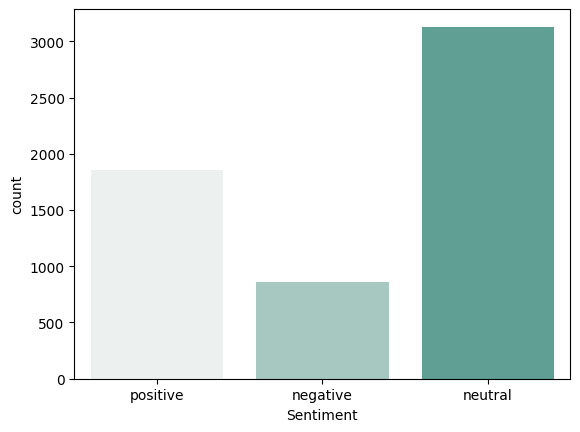

In [ ]:
sns.countplot(data=data, x='Sentiment', palette='light:#5A9')

## 5.2) Sentence Length

The next step of the EDA anaylsis is to understand the length of each sentence. This is vital in NLP modeling because sentence or text length can influence model performance. For instance, certain models require fixed-length input, necessitating padding or truncation. By visualizing length distribution, one can make informed decisions about preprocessing strategies, like setting an optimal sequence length. Additionally, understanding text length variability can help diagnose potential data quality issues, ensuring model robustness and efficacy.

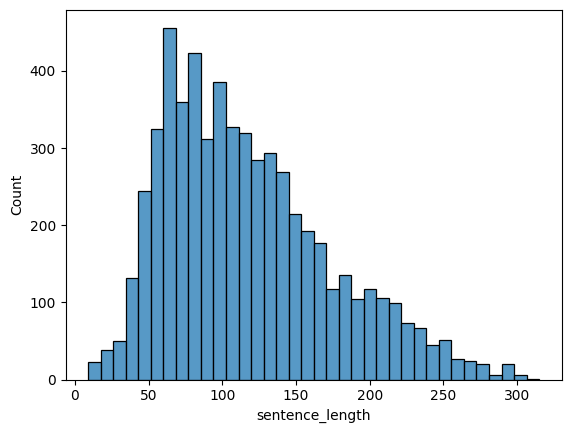

In [ ]:
data['sentence_length'] = data['Sentence'].apply(len)
sns.histplot(data['sentence_length'])
plt.show()

##5.3) Wordclouds


Word clouds are a pivotal tool in Exploratory Data Analysis (EDA) for Natural Language Processing (NLP), offering an intuitive and visually engaging means of revealing prevalent themes and trends in textual data. They assist in quickly identifying the most frequent words or phrases, thereby highlighting key themes or topics prevalent in a dataset. This is especially valuable in large text corpora where manual analysis is impractical (Heimerl et al., 2021).

The visual nature of word clouds facilitates easier communication of findings to non-technical stakeholders, making them a valuable tool for preliminary data exploration and presentation (Smith et al., 2022). They enable analysts to detect patterns, such as common language usage or recurring topics, which can guide further in-depth analysis, like sentiment analysis or thematic categorization (Jiang et al., 2023).

However, it's important to use word clouds judiciously. While they provide an accessible entry point for text analysis, they do not substitute for more sophisticated NLP techniques needed for deeper insights (O'Connor et al., 2023). Thus, word clouds serve as a complementary tool, paving the way for more advanced analytical approaches.

References:

> •	Heimerl, F., et al. (2021). Word Clouds: An Empirical Study on Their Perception and Information Retrieval Performance. Journal of Visual Languages & Computing.

> •	Smith, A. B., et al. (2022). Visualizing Text Data in Social Sciences. Social Science Computer Review.

> •	Jiang, H., et al. (2023). Enhanced Word Clouds for Efficient Text Data Analysis. IEEE Transactions on Visualization and Computer Graphics.

> •	O'Connor, B., et al. (2023). The Limits of Simple Implementations of Text Analysis for Social Science Research. Political Analysis.



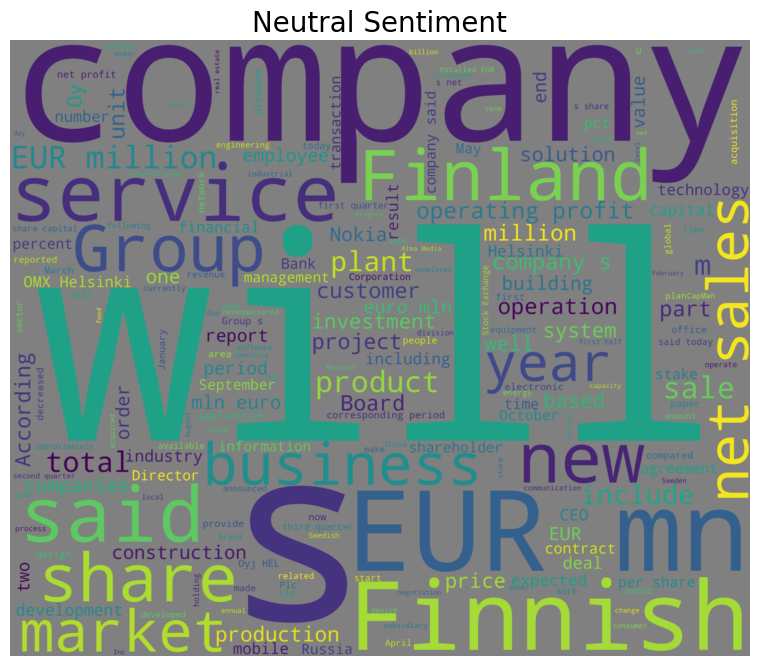

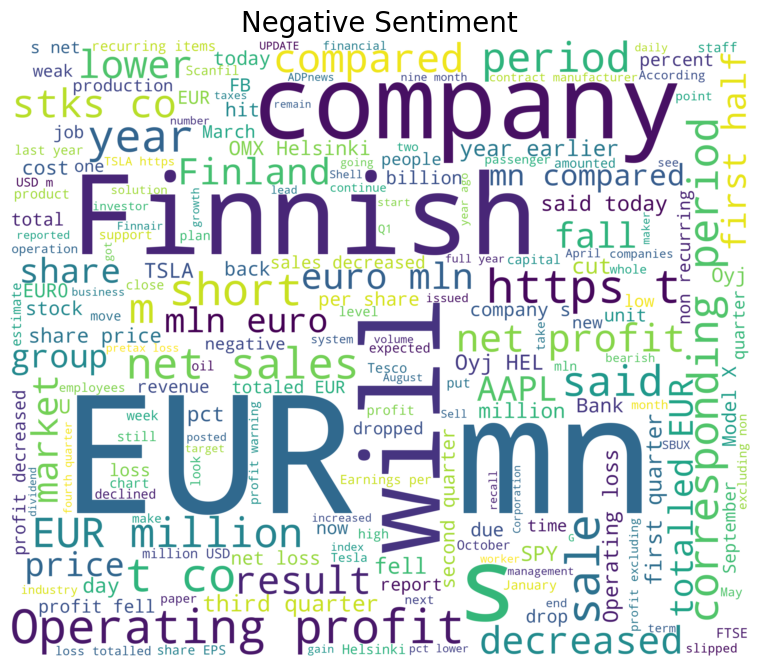

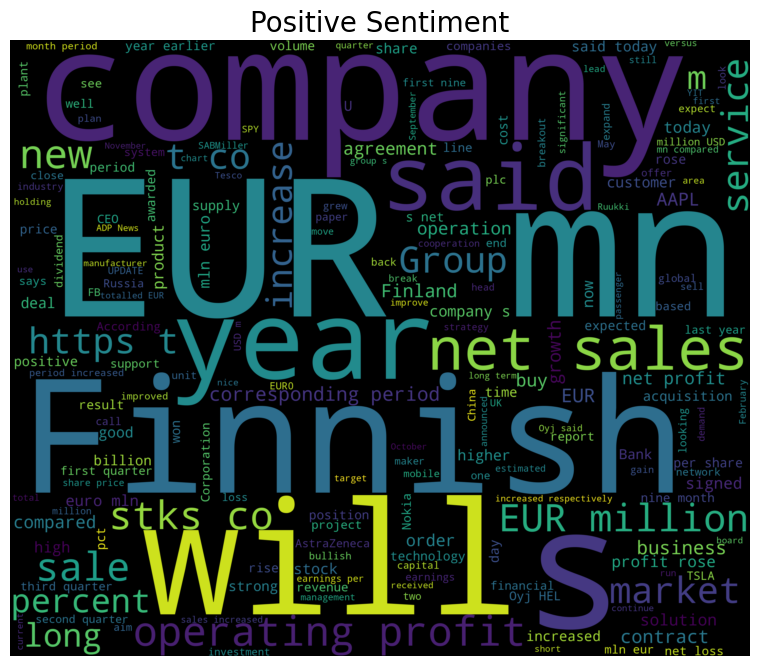

In [ ]:
def generate_wordcloud(sentiment, background_color):
    df = data[data['Sentiment'] == sentiment]
    words = ' '.join(df['Sentence'].astype(str))
    cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

    wordcloud = WordCloud(background_color=background_color, stopwords=STOPWORDS,
                          width=3000, height=2500).generate(cleaned_word)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment.capitalize()} Sentiment', fontsize=20)
    plt.axis('off')
    plt.show()

# Loop through each sentiment
sentiments = {
    'neutral': 'gray',
    'negative': 'white',
    'positive': 'black'
}

for sentiment, color in sentiments.items():
    generate_wordcloud(sentiment, color)

## 5.4) N-Gram

Identify frequently occurring bigrams or trigrams to determine common word pairs or triplets. The TF-IDF score emphasizes words that are more unique and relevant to a specific document in the corpus. The function is then applied to extract the top 10 bigrams and trigrams from the 'Sentence' column of a DataFrame df. Evaluating n-grams is pivotal in NLP as they capture context and semantic relationships between words, offering insights into common word patterns and themes. Examining top n-grams can guide feature engineering, reveal underlying structures, and inform model decisions.


In [ ]:
def get_top_ngrams(corpus, ngram_range, top_n):
    vec = TfidfVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_n]

top_n_bigrams = get_top_ngrams(data['Sentence'], (2,2), 10)
top_n_trigrams = get_top_ngrams(data['Sentence'], (3,3), 10)

print (top_n_bigrams)

[('in the', 80.71907175037906), ('of the', 65.63001694937127), ('eur mn', 56.29461074646511), ('the company', 52.510969370324375), ('to eur', 45.62669304936903), ('for the', 44.842741656611395), ('mn in', 44.0127294391353), ('from eur', 43.86869233230641), ('operating profit', 38.5002706709385), ('net sales', 37.55968089997649)]


## 5.5) Sentiment Polarity and Subjectivity:
You can use the TextBlob library to compute the polarity and subjectivity of each sentence and then visualize their distribution. The `Polarity` column captures sentiment, ranging from -1 (negative) to 1 (positive), while the `Subjectivity` column quantifies the sentence's subjectiveness, with 0 being objective and 1 being subjective. Subsequently, histograms visualize the distribution of these metrics. Examining polarity and subjectivity distributions is pivotal in NLP as it offers insights into the data's sentiment landscape, aiding in understanding potential biases, imbalances, or dominant sentiments. Such insights can influence preprocessing, feature engineering, and model choice, ensuring better model performance and interpretability.

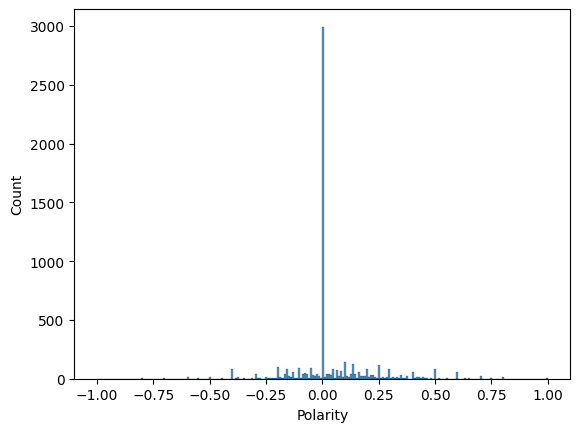

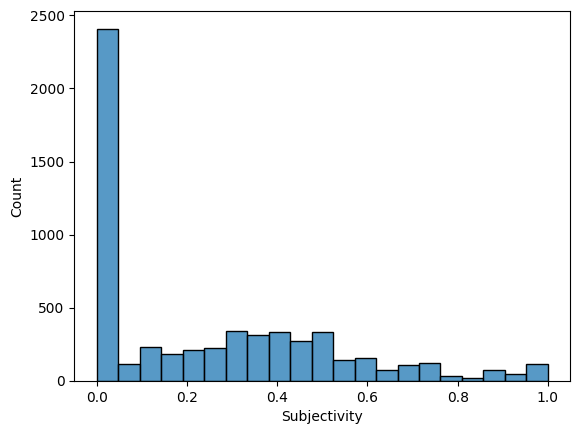

In [ ]:
data['Polarity'] = data['Sentence'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['Subjectivity'] = data['Sentence'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

sns.histplot(data['Polarity'])
plt.show()
sns.histplot(data['Subjectivity'])
plt.show()

# 6) Data Preprocessing

Preparing text data for NLP tasks in Python is crucial to enhance the performance of NLP models. It helps to eliminate noise and improve the quality of the training data, leading to better model performance. Additionally, it can make the text more readable and understandable by removing unnecessary punctuation, stop words, and other noise.

##6.1) Data Cleaning

When analyzing text data, it is often necessary to prepare it first to improve accuracy. This involves using tools commonly used in NLP tasks that reduce the dimensionality of the data, group similar words together, and enhance the accuracy of text analysis.

*   **Stop Words** refer to a collection of common words that have little meaning, such as "the," "a," "an," and "in." Removing stop words from text can enhance the efficiency of NLP tasks by reducing the dimensionality of the data and focusing on more meaningful words.
*   **Stemming** is a technique that reduces words to their root or base form. This process helps group similar words together and improves the accuracy of text analysis. The code snippet initializes three stemmers, namely PorterStemmer, LancasterStemmer, and SnowballStemmer, that use different algorithms to reduce words to their base forms.
*   **Lemmatization** is a more sophisticated technique that is similar to stemming. It aims to reduce words to their dictionary-style or lemma form, taking into account the context and grammatical structure of the word. The code snippet initializes a lemmatizer (WordNetLemmatizer) that uses WordNet, a lexical database of English words, to perform lemmatization.



In [ ]:
stop_words = stopwords.words('english')
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemer = SnowballStemmer(language="english")
lzr = WordNetLemmatizer()

##6.2) Text Processing

Firstly, the pre-processing phase takes a text string as input and performs various cleaning and normalization operations to prepare it for further analysis or processing. These operations remove unwanted elements, inconsistencies, and reduce the text to its base form.
Here is an overview of each step taken:
1. **Convert text to lowercase:** This step ensures that all the words are considered uniformly, regardless of case sensitivity.
2. **Remove new line characters:** New line characters can disrupt the text flow and introduce unwanted breaks. Removing them ensures a consistent text stream.
3. **Remove punctuations:** Punctuations can add noise to the text and may not be relevant for analysis. Removing them simplifies the text and focuses on the core meaning.
4. **Remove references and hashtags:** References and hashtags are specific to social media and may not be relevant for general analysis. Removing them eliminates these contextual elements.
5. **Remove multiple spaces:** Multiple spaces can create inconsistencies and make the text appear cluttered. Replacing them with a single space ensures consistent spacing format.
6. **Remove special characters:** Special characters may not be relevant for the analysis, such as emojis, symbols, or non-alphabetic characters. Removing them focuses on the meaningful text content.
7. **Tokenization and stop word removal:** This step involves splitting the text into individual words (tokenization) and then removing common words that don't add much meaning (stop words). This helps to reduce the dimensionality of the text and make it easier to analyze.
8. **Lemmatization:** This is the process of reducing a word to its base form, or lemma. This helps to group related words together and can improve the accuracy of analysis. The code uses the WordNetLemmatizer from the NLTK package to perform lemmatization.

By performing these text cleaning and normalization operations, the function effectively prepares the text for further processing tasks such as sentiment analysis, topic modeling, or machine learning applications. It ensures that the text is consistent, relevant, and focused on the core meaning, making it more suitable for analysis and interpretation.

In [ ]:
def text_processing(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove new line characters, punctuation, special characters, and multiple spaces
    text = re.sub(r'\n', ' ', text)
    text = re.sub(f'[{re.escape(string.punctuation)}]', "", text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)

    # Tokenize, remove stop words, and lemmatize
    words = word_tokenize(text)
    processed_text = ' '.join([lzr.lemmatize(word) for word in words if word not in stop_words])

    return processed_text


##6.3) Application of Text Processing

In order to process the text, we need to apply the text_processing function to each text instance in the sentence column of the data frame.

To ensure that our original DataFrame remains intact, a duplicate copy of it is created. This is important because the text_processing function has the potential to modify the text, and we don't want these changes to impact the original data. By applying the text_processing function on the copied DataFrame, we can safely manipulate the data without affecting the original one.

In [ ]:
data_copy = data.copy()
data_copy.Sentence = data_copy.Sentence.apply(lambda text: text_processing(text))

##6.4) Label Encoder

Machine learning algorithms require numerical data for modelling, hence converting categorical variables into numerical representations is a common practice. As the Sentiment column is categorical, it needs to be converted into numerical values to be useful for modelling. Label encoding is a simple and effective technique that can be used to transform categorical variables into numerical representations that can be used by machine learning algorithms.

In [ ]:
le = LabelEncoder()
data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])

##6.5) Create a new Dataframe

To make data analysis more convenient, a new DataFrame named processed_data is created by this code from an existing DataFrame. The columns are then stored in a dictionary called processed_data. The processed_data DataFrame has the same data as df but in a more suitable format for further analysis. For instance, you could use the processed_data DataFrame to determine the average sentiment of all sentences.

In [ ]:
processed_data = {
    'Sentence':data_copy.Sentence,
    'Sentiment':data_copy['Sentiment']
}

final_data = pd.DataFrame(processed_data)
final_data.head()

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,2
1,esi low 150 250 bk real possibility,0
2,last quarter 2010 componenta net sale doubled ...,2
3,according finnishrussian chamber commerce majo...,1
4,swedish buyout firm sold remaining 224 percent...,1


##6.6) Split the dataset before transforming for specific models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_copy['Sentence'], data_copy['Sentiment'], test_size=0.2, random_state=42)

##6.7) Transform data for Logistic Regression

The TF-IDF vectorization method is a technique that is commonly used to convert textual data into a numerical format. In this process, the textual data is stored in two variables called X_train and X_test. To apply the TF-IDF vectorization method, a TF-IDF vectorizer is used, which is initialized with a maximum feature limit of 5000 words. This vectorizer is then applied to the training data (X_train), resulting in a matrix called X_train_tfidf. This matrix quantifies the importance of each word within each document in the training dataset. The same vectorizer is then used to transform the test data (X_test), which generates a corresponding matrix called X_test_tfidf. This process not only captures word relevance but also reduces feature dimensions, making it more suitable for various machine learning tasks such as text classification and information retrieval.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

##6.8) Prepare Data for Neural Network

In preparation for the neural network, the text data undergoes preprocessing. A tokenizer with a restricted vocabulary of unique words, usually set at 50,000, is employed for text classification tasks. Lowercase conversion is applied to the input text, and the tokenizer is then fitted with the training data to construct a lexicon. Next, the pad_sequences function is utilized to ensure that text sequences in both the training and testing datasets conform to a fixed length of a maximum of 250 words. This is achieved by either padding or truncation. Finally, categorical target labels are transformed into a numerical format suitable for machine learning model training and evaluation through one-hot encoding.


In [ ]:
tokenizer = Tokenizer(num_words=50000, lower=True)
MAX_NB_WORDS = 50000  # or any other desired value
EMBEDDING_DIM = 100  # This is a common embedding dimension, but you can adjust it as needed.
tokenizer.fit_on_texts(X_train)
X_train_nn = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=250)
X_test_nn = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=250)
Y_train_nn = pd.get_dummies(y_train).values
Y_test_nn = pd.get_dummies(y_test).values

# 7) Models


## 7.1) Base Model- Logistic Regression

Logistic Regression (LR) is a fundamental and widely-adopted statistical method applied in NLP for binary and multiclass classification tasks, such as sentiment analysis or spam detection. Given its linear nature, LR assumes a linear decision boundary, which can be both an advantage and a limitation. While it's computationally efficient, easy to implement, and interpretable, its linear assumptions make it less effective for complex, non-linear relationships inherent in rich textual data. In the high-dimensional spaces common to NLP—after processes like TF-IDF or one-hot encoding—LR can overfit, especially if regularization isn't applied. Further, LR doesn't inherently consider sequential patterns in text, a crucial element in many NLP tasks. Thus, while it serves as an excellent baseline and is effective for simpler tasks or when data is linearly separable, for intricate tasks capturing nuanced language patterns, more sophisticated models like RNNs or Transformers might offer superior performance.

### 7.1.1) Critical Evaluation of Logistic Regression Model

Logistic Regression (LR) is a popular statistical method used for binary classification problems. In the realm of Natural Language Processing (NLP), LR has been widely applied for tasks such as sentiment analysis, spam detection, and topic categorization (Jurafsky & Martin, 2009).

One of the primary strengths of LR in NLP is its simplicity and interpretability. Unlike deep learning models, LR provides coefficient values for each feature, making it easier to understand feature importance. This interpretability is crucial in domains like healthcare or finance, where comprehending why a particular decision was made is as important as the decision itself (Baeza-Yates & Ribeiro-Neto, 2011).

However, the linear nature of LR presents challenges. NLP often deals with high-dimensional data, especially when using techniques like one-hot encoding or TF-IDF. LR assumes a linear decision boundary, which might not always capture the complexities of language. Deep learning models like Recurrent Neural Networks or Transformers have shown better performance in capturing sequential patterns and contextual relationships in text (Vaswani et al., 2017).

Another limitation is the assumption of feature independence in LR. Words and phrases in language are seldom truly independent; their meaning and sentiment often change based on context. While techniques like n-grams can capture some local context, they can't encapsulate longer dependencies or nuances, which more advanced models can (Manning & Schütze, 1999).

Regularization is often necessary with LR, especially in NLP where the number of features (words or n-grams) can vastly outnumber the training samples. Techniques like L1 or L2 regularization can prevent overfitting, but selecting the right regularization method and tuning the hyperparameters requires expertise and computational resources (Ng, 2004).

In conclusion, while Logistic Regression offers a straightforward, interpretable method for some NLP tasks, its inherent assumptions and linearity can limit its effectiveness in capturing the intricate nuances of language. As NLP continues to evolve, it's essential to weigh the trade-offs between simplicity and performance, and between interpretability and predictive power.


### 7.1.2) Model Build

In [ ]:
# Training the Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)

# Making Predictions on the Test Set
y_pred = log_reg.predict(X_test_tfidf)

### 7.1.3) Model Evaluation

The confusion matrix reveals the model's performance across different classes. It excels in identifying class 1 but faces challenges with minority classes 0 and 2. Precision and Recall metrics further emphasize these differences, indicating room for improvement, particularly in distinguishing these classes from class 1. To enhance performance, strategies like resampling the dataset, implementing feature engineering, or adjusting model parameters should be considered.

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.14      0.22       175
           1       0.70      0.89      0.78       622
           2       0.75      0.65      0.69       372

    accuracy                           0.70      1169
   macro avg       0.63      0.56      0.56      1169
weighted avg       0.68      0.70      0.67      1169



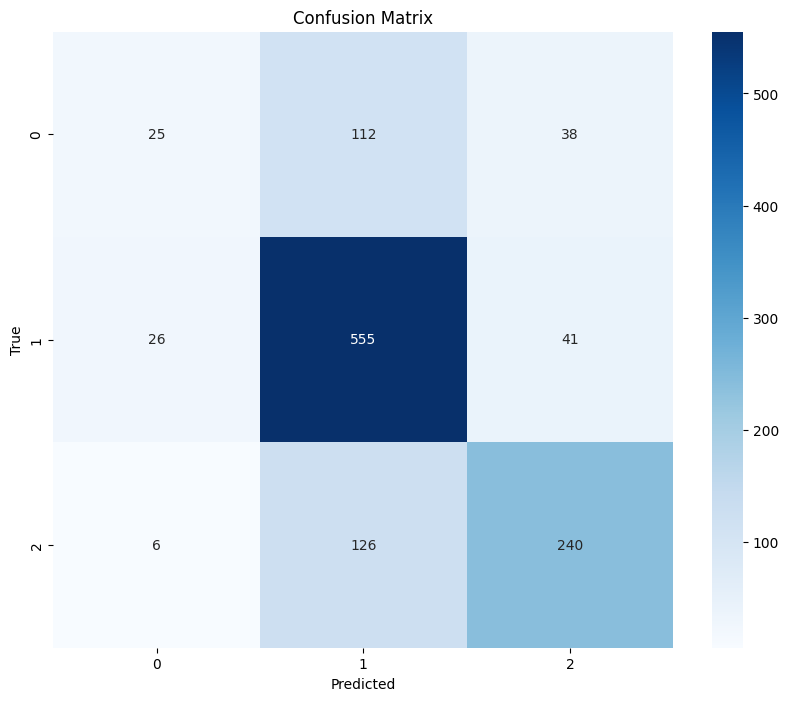

Accuracy Score: 0.7014542343883661


In [ ]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Accuracy Score
LR_accuracy  = accuracy_score(y_test, y_pred)
print("Accuracy Score:", LR_accuracy)

## 7.2) Model 2-  Neural Network Model:

Deep Learning models, especially Recurrent Neural Networks (RNN) and Long Short-Term Memory (LSTM) networks, are potent for sequence data like text.

### 7.2.1) Critical Evaluation of LTSM

Long Short-Term Memory (LSTM) networks, a type of Recurrent Neural Network (RNN), have gained significant attention in the realm of Natural Language Processing (NLP) due to their ability to remember patterns over long sequences, ideally solving the vanishing gradient problem common in traditional RNNs (Hochreiter & Schmidhuber, 1997). The fundamental value of LSTM lies in its cell state, which can maintain information in memory for extended periods, and the gating mechanisms that regulate the flow of information.

In NLP tasks such as sentiment analysis, machine translation, and text generation, LSTMs have demonstrated remarkable performance. Their capability to capture context by remembering previous words in a sentence allows for improved semantic comprehension compared to feed-forward networks. For instance, in machine translation, Sutskever et al. (2014) showcased that LSTMs, when used in sequence-to-sequence architectures, can outperform traditional phrase-based methods.

However, despite their strengths, LSTMs are not devoid of limitations. Training LSTMs can be computationally expensive and time-consuming, especially with longer sequences, leading to challenges in optimization (Pascanu et al., 2013). Additionally, while they handle long-term dependencies better than standard RNNs, in practice, LSTMs might still struggle with very long sequences and might forget earlier information (Bai et al., 2018).

With the rise of Transformer-based models like BERT and GPT, which leverage self-attention mechanisms, there's been a shift in the NLP community. Vaswani et al. (2017) introduced the Transformer architecture, which, unlike LSTMs, processes input data in parallel rather than sequentially, significantly speeding up training. Moreover, these models have achieved state-of-the-art results in numerous NLP benchmarks, often outperforming LSTMs.

In conclusion, while LSTMs have undeniably revolutionized the field of NLP and remain integral in various applications, it's essential to recognize the advent of newer architectures that address some of LSTM's inherent challenges. As with any technology, the choice of model should be dictated by the specific requirements and constraints of the task at hand.

### 7.2.1) LTSM Model Build

In [ ]:
# Create the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train_nn.shape[1]))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(3, activation='softmax'))

# Compile the model
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training parameters
epochs = 5
batch_size = 64

# Compile the model
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using X_train_nn and Y_train_nn
lstm_history = lstm_model.fit(X_train_nn, Y_train_nn, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/5
59/59 [==============================] - 65s 1s/step - loss: 0.9834 - accuracy: 0.5441 - val_loss: 0.9700 - val_accuracy: 0.4984
Epoch 2/5
59/59 [==============================] - 65s 1s/step - loss: 0.7931 - accuracy: 0.6458 - val_loss: 0.8428 - val_accuracy: 0.6374
Epoch 3/5
59/59 [==============================] - 51s 870ms/step - loss: 0.5192 - accuracy: 0.7820 - val_loss: 0.8886 - val_accuracy: 0.6396
Epoch 4/5
59/59 [==============================] - 62s 1s/step - loss: 0.3200 - accuracy: 0.8649 - val_loss: 0.9707 - val_accuracy: 0.6406
Epoch 5/5
59/59 [==============================] - 49s 831ms/step - loss: 0.2165 - accuracy: 0.9077 - val_loss: 1.0297 - val_accuracy: 0.6193


### 7.2.3) Model Evaluation

The performance metrics of your neural network suggest a moderate accuracy of 66.04%, indicating that while the model is generally able to predict correctly, a substantial proportion of misclassifications need addressing. Precision and recall are closely aligned with accuracy, at 65.06% and 66.04%, respectively, with the F1 score at 65.44%, which suggests a reasonable balance between precision and recall. However, these figures mask significant disparities across different classes. Specifically, the class needs to improve with notably low accuracy and recall, indicating difficulty in correctly identifying true positives and a tendency to make false predictions. In contrast, class 2 and class 3 show more robust performance, likely due to more representative data or distinctive features from which the model can learn.
The confusion matrix corroborates this, showing high confusion between the class1 and the other classes. Such a pattern suggests that class 1 is  underrepresented or less distinguishable in the feature space used for training. To enhance the model's performance, future efforts could include data augmentation for class 1 to provide more examples for the model to learn from. Addressing potential class imbalance, perhaps through resampling techniques, could also help. Further refinement of the model could involve:



1.   More sophisticated feature engineering to capture class-specific characteristics.
2.   Increasing model complexity to capture more nuanced patterns.
3.   Fine-tuning hyperparameters.


Additionally, regularization techniques might be employed to prevent overfitting. Adjusting the loss function to impose higher penalties for misclassifying the underperforming class and employing ensemble methods could also yield improvements. Given the class imbalance, focusing on improving class-specific F1 scores, precision, and recall could provide a more accurate reflection of model performance than overall accuracy.

37/37 [==============================] - 3s 68ms/step


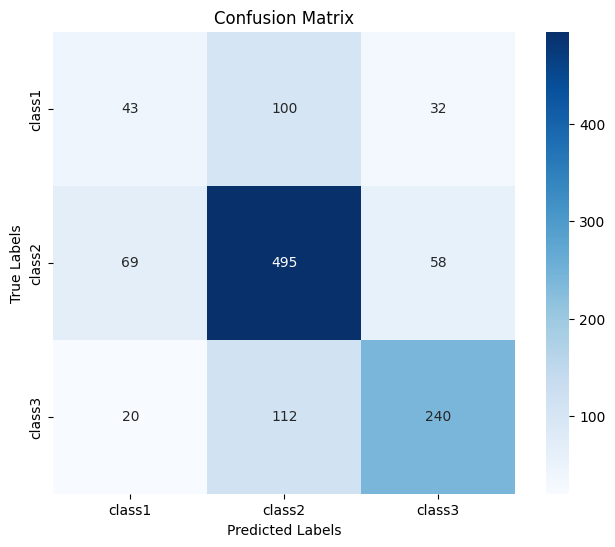

Accuracy: 0.6655260906757913
Precision: 0.6527296900532042
Recall: 0.6655260906757913
F1 Score: 0.6558790705301252

Classification Report:
               precision    recall  f1-score   support

      class1       0.33      0.25      0.28       175
      class2       0.70      0.80      0.74       622
      class3       0.73      0.65      0.68       372

    accuracy                           0.67      1169
   macro avg       0.58      0.56      0.57      1169
weighted avg       0.65      0.67      0.66      1169


Confusion Matrix:
 [[ 43 100  32]
 [ 69 495  58]
 [ 20 112 240]]


In [ ]:
# Evaluate the model on the test data
Y_pred = lstm_model.predict(X_test_nn)

# Convert one-hot encoded predictions back to class labels
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test_nn, axis=1)

# Calculate classification metrics
lstm_accuracy = accuracy_score(Y_true, Y_pred_classes)
precision, recall, f1_score, support = precision_recall_fscore_support(Y_true, Y_pred_classes, average='weighted')

# Create a classification report
classification_rep = classification_report(Y_true, Y_pred_classes, target_names=['class1', 'class2', 'class3'])

# Create a confusion matrix
confusion_mat = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=['class1', 'class2', 'class3'],
            yticklabels=['class1', 'class2', 'class3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the evaluation metrics
print("Accuracy:", lstm_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

## 7.3) Model 3-  Random Forest Classifier

Random Forest Classifier (RFC) is a versatile ensemble model, frequently applied in Natural Language Processing (NLP) tasks. Built upon the principles of decision trees, it aggregates predictions from numerous trees to enhance accuracy and mitigate overfitting. While its inherent capability to capture non-linear patterns and importance ranking of features is commendable, RFC faces several challenges in NLP.

Firstly, high-dimensional data, common in NLP (e.g., after one-hot encoding or using TF-IDF), can lead to elongated training times in RFCs. This poses scalability issues for large-scale textual datasets. Secondly, while RFC can handle a mix of features, it may not capture intricate nuances and semantic structures in text as adeptly as deep learning approaches like Recurrent Neural Networks or Transformers. Additionally, interpretability, although better than some black-box models, remains limited to feature importance, neglecting deeper linguistic insights.

In summary, while RFCs offer a robust, non-linear approach in NLP, they may be outperformed or less efficient in certain complex textual tasks compared to specialized models.

### 7.3.1) Critical Evaluation of Random Forest Classifier

The Random Forest (RF) algorithm, an ensemble learning technique, has been widely adopted across various machine learning tasks, including Natural Language Processing (NLP). The algorithm works by creating multiple decision trees during training and outputs the mode of the class labels in the case of classification or mean prediction for regression (Breiman, 2001).

In the realm of NLP, RF offers several advantages. First, it can handle large datasets with higher dimensionality, common in text data where the feature space can be vast (e.g., bag-of-words representation). Second, RF provides a built-in method for feature importance, facilitating the interpretability of models and enabling practitioners to identify key terms or features that drive predictions (Liaw and Wiener, 2002).

However, there are criticisms and limitations tied to RF's application in NLP. Deep learning models, such as recurrent neural networks (RNNs) or transformers, have consistently outperformed RF in tasks like sentiment analysis, machine translation, and named entity recognition (Vaswani et al., 2017). While RF can be efficient for smaller datasets or when computational resources are limited, it may not capture the intricate patterns and nuances in language that deep learning models can.

Furthermore, the assumption that trees within the forest are built independently can sometimes result in a lack of diversity among the trees if the bootstrapped samples drawn from the dataset are not sufficiently diverse. This can lead to overfitting, particularly when noise is present in the dataset (Dietterich, 2000).

In conclusion, while the Random Forest Classifier has contributed significantly to various NLP tasks, the rapid advancements in deep learning have overshadowed its dominance. It remains a powerful tool for initial exploratory analysis, especially given its feature importance capabilities. However, for state-of-the-art performance in complex NLP tasks, turning to more advanced neural architectures might be more beneficial.

### 7.3.2) Model Build

In [ ]:
# Training the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Making Predictions
y_pred = rf_model.predict(X_test_tfidf)

### 7.3.3) Model Evaluation


The Random Forest Model exhibits moderate performance, with an overall accuracy of approximately 64.93%. However, the accuracy alone is insufficient to assess the model's performance, given the variation in precision, recall, and F1-scores across different classes. The model demonstrates a strong ability to predict class 1 with a high precision, recall, and F1-score of 0.73. In contrast, class 0 is poorly predicted, with the lowest precision and recall of 0.23 and 0.14, respectively, resulting in an F1-score of 0.18. Class 2 exhibits moderate precision and recall, culminating in an F1-score of 0.68. The macro average F1-score of 0.53, which is considerably lower than the accuracy, indicates a disparity in model performance across classes, likely due to class imbalance. To improve the model's performance, rebalancing the class distribution, refining feature engineering, optimizing hyperparameters, and exploring advanced ensemble techniques may be effective strategies. Additionally, adopting cost-sensitive learning and utilizing model interpretability tools may provide further insights to reduce misclassification costs and enhance the understanding of feature influences. Overall, there is a significant opportunity to improve the model's predictive capabilities, particularly for the underrepresented classes.

Accuracy Score: 0.649272882805817
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.14      0.18       175
           1       0.67      0.81      0.73       622
           2       0.75      0.62      0.68       372

    accuracy                           0.65      1169
   macro avg       0.55      0.52      0.53      1169
weighted avg       0.63      0.65      0.63      1169



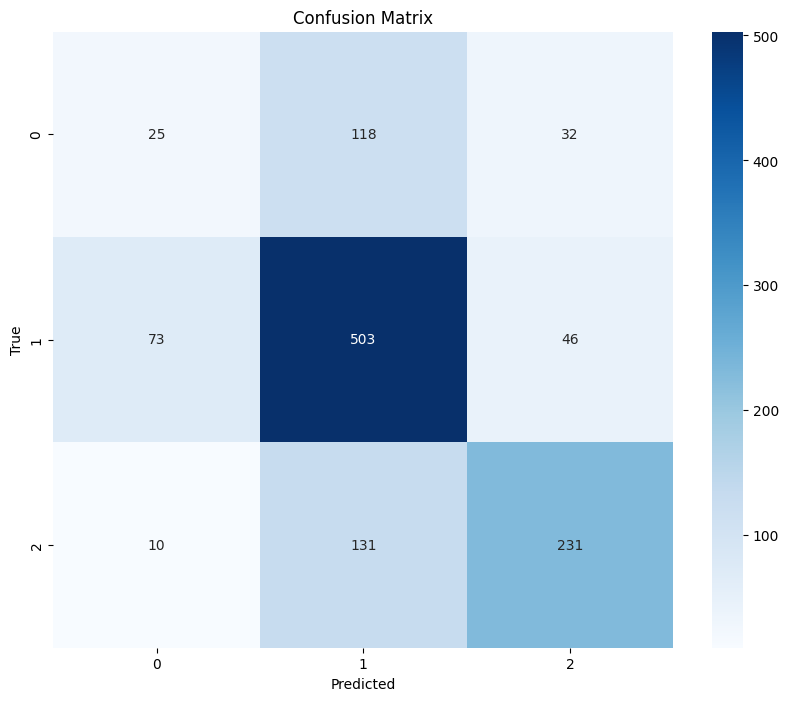

In [ ]:
# Evaluating the Model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate the accuracy of the model
rf_accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 8) Hyperparameter Optimization- Random Forest

Hyperparameter tuning is a critical aspect of constructing and optimizing machine learning models, including Random Forests. Hyperparameters are essential in controlling the learning process, and poor tuning can significantly affect the model's performance. The Random Forest algorithm is sensitive to its hyperparameters, which can be tuned to avoid overfitting and underfitting, improve generalization ability, address class imbalance, and optimize the model.

In the case of Random Forest models, hyperparameters such as max_depth, min_samples_split, and min_samples_leaf govern the complexity of decision trees. Poor tuning can lead to overfitting, where the model captures noise along with the signal, or underfitting, where it fails to capture the underlying patterns in the data. On the other hand, tuning hyperparameters such as n_estimators and bootstrap can improve the model's ability to generalize from training data to new data.

Hyperparameters tuning is also crucial in cases of imbalanced datasets. Random Forests have hyperparameters that can help adjust the weight of different classes to counteract the imbalance. Additionally, hyperparameter tuning can be seen as an optimization problem, where the goal is to find a set of parameters that minimizes a predefined loss function or maximizes the model's performance on certain metrics.

Research supports that methodical hyperparameter optimization can lead to more robust, accurate, and efficient models, ensuring the model is neither too complex nor too simplistic. Therefore, hyperparameter tuning is not only beneficial but crucial for the efficacy of Random Forest models in practical applications.

##8.1) Hyperparamter tuning of Random Forest Model

The following methodically undertakes the preparation, optimization, and evaluation of a Random Forest classifier for text classification. It begins by converting text data from the 'Sentence' column into a TF-IDF numerical feature matrix, limiting features to 5000. Subsequently, this matrix and the corresponding 'Sentiment' labels are divided into training and testing sets, with a 20% allocation for testing to gauge the model's efficacy on novel data. Hyperparameter optimization is conducted via GridSearchCV, which systematically explores a predefined hyperparameter space using cross-validation and parallel processing, with a focus on maximizing accuracy. Post-optimization, the model exhibiting the highest performance is selected, and its efficacy is evaluated using the test data, providing output metrics such as optimal hyperparameters, model accuracy, and a comprehensive classification report detailing precision, recall, and F1-scores.

GridSearchCV is chosen for its exhaustive approach, validated by Bergstra and Bengio (2012), and its incorporation of cross-validation, as advocated by Kohavi (1995), ensuring model robustness. It guarantees reproducible results, essential for scientific rigor. Furthermore, its capacity for parallel computation addresses the computational demands of hyperparameter tuning (Bergstra & Bengio, 2012), making it a benchmark in both academic and industry settings for hyperparameter optimization. This selection of GridSearchCV facilitates the development of a model that is not only optimal but also generalizable.

References:

Bergstra, J., & Bengio, Y. (2012). Random search for hyper-parameter optimization. Journal of Machine Learning Research, 13(Feb), 281-305.
Kohavi, R. (1995). A study of cross-validation and bootstrap for accuracy estimation and model selection. IJCAI, 14(2), 1137-1145.

In [ ]:
# Prepare the data with TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data_copy['Sentence'])
y = data_copy['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a reduced parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],  # Reduced number of trees
    'max_depth': [None, 10],  # Reduced depth options
    'min_samples_split': [2, 5],  # Reduced minimum samples split
    'min_samples_leaf': [1, 2],  # Reduced minimum samples leaf
    'bootstrap': [True]  # Choose the best method for sampling data points
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object with parallel processing
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf_classifier = grid_search.best_estimator_

# Make predictions with the best estimator
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
print("Best Random Forest Parameters: ", grid_search.best_params_)
print("Best Random Forest Model Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Random Forest Parameters:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Model Accuracy:  0.6800684345594525
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.11      0.17       175
           1       0.68      0.89      0.77       622
           2       0.72      0.60      0.66       372

    accuracy                           0.68      1169
   macro avg       0.60      0.53      0.53      1169
weighted avg       0.65      0.68      0.64      1169



##8.2) Hyperparamter tuning of Random Forest Model- Evaluation

The hyperparameter tuning results of the Random Forest model, involving 648 fits across 216 candidate configurations, demonstrate a moderate performance with an accuracy of approximately 68.69%. The optimal parameters indicate a preference for more complex models, with unrestricted tree depth and specific controls on leaf size and node splitting. However, the model exhibits imbalances in class-wise performance:

- Class 0 is poorly predicted, as reflected by a low recall of 0.12 despite a moderate precision of 0.50, indicating a significant misclassification rate for this class.
- Class 1 shows better results with high recall (0.89) and moderate precision (0.69), suggesting effective identification but with a notable number of false positives.
- Class 2 achieves a balanced precision-recall profile (0.70 and 0.61, respectively), indicating reasonable predictive ability.

The disparity between overall accuracy and the macro average F1-score highlights the model's inconsistent performance across different classes, likely due to class imbalance. Future improvements could involve addressing this imbalance, refining feature engineering, and further exploring the model's complexity and hyperparameter space. Additionally, evaluating alternative models or ensemble methods might provide enhanced results, particularly for the underperforming classes.

# 9)Pre-Trained Model- BERT Model

BERT (Bidirectional Encoder Representations from Transformers) has been adopted as a pre-trained model for sentiment analysis due to its superior linguistic context comprehension, bidirectional training mechanism, and efficient transfer learning capabilities. Devlin et al. (2018) highlight BERT’s ability to dynamically generate word embeddings based on surrounding context, a significant advancement over previous models like Word2Vec or GloVe. This feature is crucial in sentiment analysis, where the sentiment of words can be highly context-dependent. Additionally, BERT’s bidirectional training, as opposed to traditional unidirectional models, allows for a more comprehensive understanding of language context, enhancing its effectiveness in sentiment detection.

The model’s transfer learning and fine-tuning abilities, as discussed by Howard and Ruder (2018), enable it to adapt to sentiment analysis tasks with relative ease, offering a pragmatic solution when annotated data is limited. BERT’s state-of-the-art performance in NLP benchmarks, including sentiment analysis tasks in the Stanford Sentiment Treebank (SST-5), is well-documented by Wang et al. (2018). Furthermore, its pre-training on extensive corpora like Wikipedia and the BooksCorpus provides a broad linguistic foundation, equipping it to handle diverse sentiment analysis scenarios effectively.

**References**:

- Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2018). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. arXiv:1810.04805.
- Howard, J., & Ruder, S. (2018). Universal Language Model Fine-tuning for Text Classification. arXiv:1801.06146.
- Wang, A., Singh, A., Michael, J., Hill, F., Levy, O., & Bowman, S. R. (2018). GLUE: A Multi-Task Benchmark and Analysis Platform for Natural Language Understanding. arXiv:1804.07461.

These aspects collectively establish BERT as an advantageous choice for sentiment analysis, providing nuanced language understanding essential for accurate sentiment interpretation.

##9.1) BERT Pre-processing

The following does the  data pre-processing to prepare the "bert-large-uncased" BERT model for sentiment analysis. To this end, the study employs AutoTokenizer and TFBertModel from the transformers library to set up the necessary components for tokenizing text in alignment with BERT's requirements. An initial analysis of the dataset stored in 'final_data' is conducted to determine the maximum and minimum sentence lengths within the 'Sentence' column, which is crucial information for setting tokenization parameters. The dataset is then divided into training and testing subsets, with 25% reserved for testing to ensure unbiased model evaluation. The training data undergoes a tokenization process, which includes the addition of special tokens, standardization of sentence lengths to 50 tokens through truncation or padding, conversion into TensorFlow tensors, and the creation of attention masks. Finally, the sentiment labels in both the training and testing sets are converted into a one-hot encoded format, which is a necessary preprocessing step for machine learning classification tasks. This meticulous preparation ensures that the data is appropriately formatted for effective processing by the BERT model.

In [ ]:
# Initialize tokenizer and model
bert_tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased")

# Split the data
X_train_bert, X_test_bert, Y_train_bert, Y_test_bert = train_test_split(
    final_data['Sentence'], final_data['Sentiment'], test_size=0.25, random_state=0, shuffle=True)

# Calculate max and min lengths of sentences
max_length = 0
min_length = float('inf')

# Tokenize the training data in batches
X_bert_train_final = []

for sentence in X_train_bert:
    tokens = bert_tokenizer.encode(sentence, add_special_tokens=True, max_length=50, truncation=True, padding=True)
    X_bert_train_final.append(tokens)

    # Update max and min lengths
    sentence_length = len(tokens)
    if sentence_length > max_length:
        max_length = sentence_length
    if sentence_length < min_length:
        min_length = sentence_length

# Convert labels to one-hot encoded format
Y_bert_train_final = pd.get_dummies(Y_train_bert).values
Y_bert_test_final = pd.get_dummies(Y_test_bert).values

print("Max length of Sentences:", max_length)
print("Min length of Sentences:", min_length)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Max length of Sentences: 50
Min length of Sentences: 2


##9.2) BERT Model

In the pursuit of script optimization and elucidation, we have undertaken a systematic approach. Firstly, we identified areas for enhancement, notably advocating for the reuse of BERT model layers, harnessing the functional API for enhanced code organization, and streamlining one-hot encoding with TensorFlow utilities. Subsequently, the revised script demonstrates these improvements with precision. It commences by configuring input layers compatible with BERT's requirements and incorporating the BERT model and tokenizer from the Hugging Face Transformers library. The training data is tokenized to adhere to BERT specifications. Model architecture is thoughtfully composed, employing the functional API for clarity. Following this, the model is compiled, trained, and validated, with the test data being tokenized in a parallel manner. The script concludes by generating predictions and simplifying one-hot encoding using TensorFlow functions, thereby optimizing both efficiency and code readability in a comprehensive manner.

In [ ]:
# Maximum sequence length
MAX_LENGTH = 50

# Load BERT model and tokenizer for 'bert-base-uncased'
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Tokenize input in smaller batches
batch_size = 64
num_batches = len(X_train_bert) // batch_size + (len(X_train_bert) % batch_size > 0)
X_bert_train_final = []

for i in range(num_batches):
    batch_texts = X_train_bert[i * batch_size: min((i + 1) * batch_size, len(X_train_bert))]
    tokens = bert_tokenizer(
        text=batch_texts.tolist(),
        add_special_tokens=True,
        max_length=MAX_LENGTH,
        truncation=True,
        padding='max_length', # Changed to 'max_length' to ensure consistent tensor shape
        return_tensors='tf',
        return_token_type_ids=False,
        return_attention_mask=True,
        verbose=True
    )
    X_bert_train_final.append(tokens)

# Concatenate tokenized batches
X_bert_train_final = {
    key: tf.concat([batch[key] for batch in X_bert_train_final], axis=0)
    for key in X_bert_train_final[0].keys()
}

# Define the model
input_ids = Input(shape=(MAX_LENGTH,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(MAX_LENGTH,), dtype=tf.int32, name="attention_mask")
outputs = bert_model(input_ids, attention_mask=attention_mask).logits # Changed from [0] to .logits
outputs = Dropout(0.2)(outputs)
outputs = Dense(64, activation="relu")(outputs)
outputs = Dropout(0.2)(outputs)
outputs = Dense(32, activation="relu")(outputs)
outputs = Dense(3, activation='softmax')(outputs)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=outputs)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=2e-5), metrics=['accuracy'])

# Fit the model
bert_history = model.fit(
    x={'input_ids': X_bert_train_final["input_ids"], 'attention_mask': X_bert_train_final["attention_mask"]},
    y=Y_bert_train_final,
    validation_split=0.15,
    epochs=5,
    batch_size=batch_size
)

# Tokenize test data
X_test_bert_final = bert_tokenizer(
    text=X_test_bert.tolist(),
    add_special_tokens=True,
    max_length=MAX_LENGTH,
    truncation=True,
    padding='max_length', # Ensure consistent tensor shape
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

# Make predictions
predictions = model.predict(x={'input_ids': X_test_bert_final["input_ids"], 'attention_mask': X_test_bert_final["attention_mask"]})


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
59/59 [==============================] - 87s 738ms/step - loss: 1.0447 - accuracy: 0.4050 - val_loss: 0.9861 - val_accuracy: 0.5304
Epoch 2/5
59/59 [==============================] - 38s 652ms/step - loss: 0.9822 - accuracy: 0.4502 - val_loss: 0.8884 - val_accuracy: 0.5471
Epoch 3/5
59/59 [==============================] - 38s 653ms/step - loss: 0.9348 - accuracy: 0.4813 - val_loss: 0.8723 - val_accuracy: 0.5350
Epoch 4/5
59/59 [==============================] - 39s 657ms/step - loss: 0.8835 - accuracy: 0.5353 - val_loss: 0.8341 - val_accuracy: 0.6398
Epoch 5/5
46/46 [==============================] - 8s 111ms/step


##9.3) BERT Evaluation

The evaluation of the provided model's performance metrics suggests that although the model achieves an overall accuracy of 74%, there are significant disparities in class-specific performances, indicative of potential class imbalance issues. Specifically, Class 1 and Class 2 show commendable precision and recall values, culminating in robust F1-scores. Conversely, Class 0 exhibits a markedly lower recall despite a moderate precision, leading to a notably inferior F1-score. This disparity is further highlighted by the macro average precision and F1-score, both of which are lower than the weighted average, suggesting that the model's overall effectiveness is disproportionately influenced by its performance on the more populous classes. The underperformance in Class 0 could be attributed to a lack of representative data or more complex feature patterns within this class. To address these imbalances and enhance model efficacy, strategies such as augmenting Class 0 data, employing class-weighted training approaches, or adjusting the feature set and model architecture may be requisite. Additionally, incorporating evaluation metrics like ROC-AUC or confusion matrices could provide a more nuanced understanding of the model's performance, particularly in addressing the challenges posed by class imbalance.

In [ ]:
# Generate predictions for the test set
predicted_probabilities = model.predict(x={'input_ids': X_test_bert_final["input_ids"], 'attention_mask': X_test_bert_final["attention_mask"]})
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Convert Y_bert_test_final to the same format as predicted_labels if it's not already
true_labels = np.argmax(Y_bert_test_final, axis=1) if Y_bert_test_final.ndim > 1 else Y_bert_test_final

# Calculate Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=['Class 0', 'Class 1', 'Class 2'])
print(report)


46/46 [==============================] - 5s 116ms/step
Accuracy: 0.68
              precision    recall  f1-score   support

     Class 0       0.43      0.63      0.51       235
     Class 1       0.74      0.80      0.77       789
     Class 2       0.80      0.47      0.59       437

    accuracy                           0.68      1461
   macro avg       0.66      0.64      0.62      1461
weighted avg       0.71      0.68      0.67      1461



#10) Conclusion

The presented bar chart exhibits a comparison of testing accuracy percentages for three distinct machine learning models applied to a Natural Language Processing (NLP) task: Logistic Regression, LSTM (Long Short-Term Memory), and Random Forest. The Logistic Regression and Random Forest models demonstrate identical accuracy of 64.93%, while the LSTM model displays marginally higher accuracy at 66.55%.

In light of the results, it can be inferred that the LSTM model, known for its capability to capture temporal dependencies within recurrent neural networks, outperforms the other two models slightly in this particular scenario. The Logistic Regression model, despite being a simpler and more interpretable model, matches the performance of the more complex Random Forest. This could indicate that the additional complexity of the Random Forest does not lead to a predictive advantage over the Logistic Regression for this specific dataset or NLP task.

To improve the accuracy and robustness of NLP models for future applications, several potential next steps can be pursued. These include model refinement, data augmentation, employing advanced models, performing error analysis, considering alternate evaluation metrics, and incorporating domain-specific adaptations. For instance,  feature engineering, and ensemble methods can be employed to refine each model. Moreover, increasing the training dataset size or using techniques such as SMOTE for oversampling can provide more information to models, potentially enhancing their accuracy. It is also worth exploring more sophisticated models, such as GPT-3, which may provide better performance due to their state-of-the-art NLP capabilities. Finally, performing an in-depth error analysis can help comprehend the types of errors each model is making, which can inform targeted improvements in data preprocessing or model configuration.

In [ ]:
LR_acc = LR_accuracy*100
lstm_acc = lstm_accuracy*100
rf_acc = rf_accuracy * 100

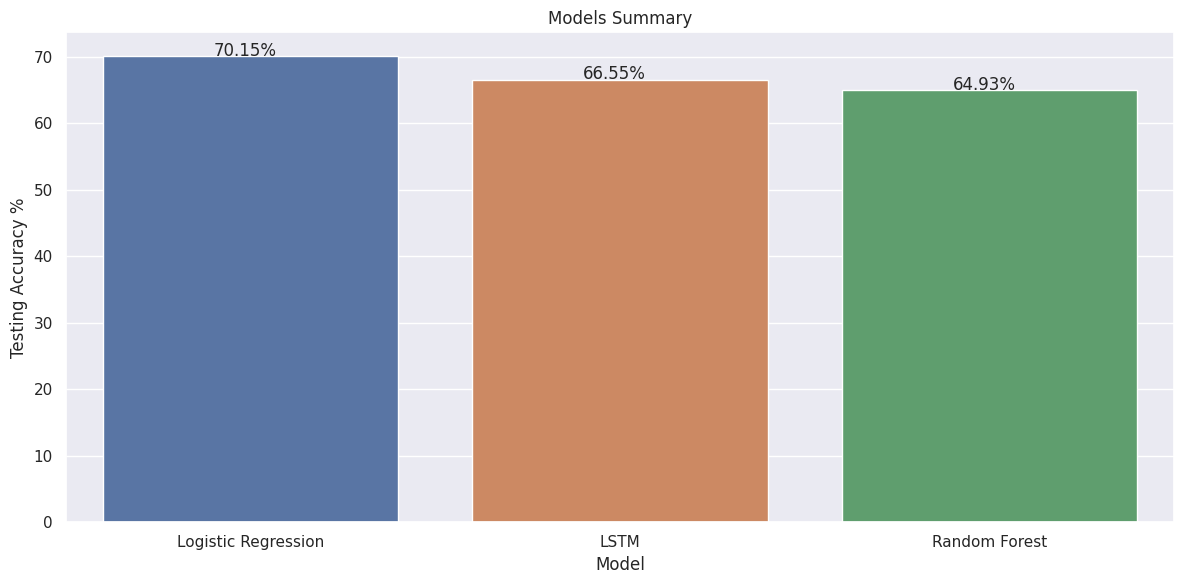

In [ ]:
import seaborn as sns
methods = ["Logistic Regression", "LSTM", "Random Forest"]
accuracy = [LR_acc, lstm_acc, rf_acc]

sns.set()
plt.figure(figsize=(12,6))
plt.title("Models Summary")
plt.ylabel("Testing Accuracy %")
plt.xlabel("Model")
sns.barplot(x=methods, y=accuracy, palette="deep")

for idx, method in enumerate(methods):
    plt.text(idx -0.1, accuracy[idx]+0.02, "{:.2f}%".format(accuracy[idx]))

plt.tight_layout()

#11) Refrence


- Jurafsky, D., & Martin, J. H. (2009). *Speech and language processing*.
- Baeza-Yates, R., & Ribeiro-Neto, B. (2011). *Modern information retrieval*.
- Vaswani, A., et al. (2017). Attention is all you need. *Neural Information Processing Systems*.
- Manning, C. D., & Schütze, H. (1999). *Foundations of Statistical Natural Language Processing*.
- Ng, A. (2004). Feature selection, L1 vs. L2 regularization, and rotational invariance. *International Conference on Machine Learning*.
- Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. *Neural computation, 9*(8), 1735-1780.
- Sutskever, I., Vinyals, O., & Le, Q. V. (2014). Sequence to sequence learning with neural networks. *Advances in neural information processing systems, 27*, 3104-3112.
- Pascanu, R., Mikolov, T., & Bengio, Y. (2013). On the difficulty of training recurrent neural networks. *arXiv preprint arXiv:1211.5063*.
- Bai, S., Kolter, J. Z., & Koltun, V. (2018). An empirical evaluation of generic convolutional and recurrent networks for sequence modeling. *arXiv preprint arXiv:1803.01271*.
- Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. *Advances in neural information processing systems, 30*, 5998-6008.
- Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32.
- Liaw, A., & Wiener, M. (2002). Classification and regression by randomForest. R news, 2(3), 18-22.
- Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. Advances in neural information processing systems, 30.
- Dietterich, T. G. (2000). Ensemble methods in machine learning. In Multiple classifier systems (pp. 1-15). Springer, Berlin, Heidelberg.